In [3]:
import pandas as pd
data = pd.read_csv('google_review_ratings.csv',header='infer')
data

,User,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("google_review_ratings.csv")
data = data.drop("User", axis=1)  # Drop the "User" column
data = data.apply(lambda x: x.fillna(x.mean()),axis=0)



# Handle NaN values by replacing them with the mean of the column
data = data.apply(lambda x: x.fillna(x.mean()),axis=0)

# Determine the best k using Silhouette coefficient
sil_scores = []

for k in range(2, 21):  # Starting from 2 because silhouette score is not defined for k=1
    scores_for_k = []
    for _ in range(5):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        scores_for_k.append(score)
        
    sil_scores.append(np.mean(scores_for_k))

# Plotting
plt.plot(range(2, 21), sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()



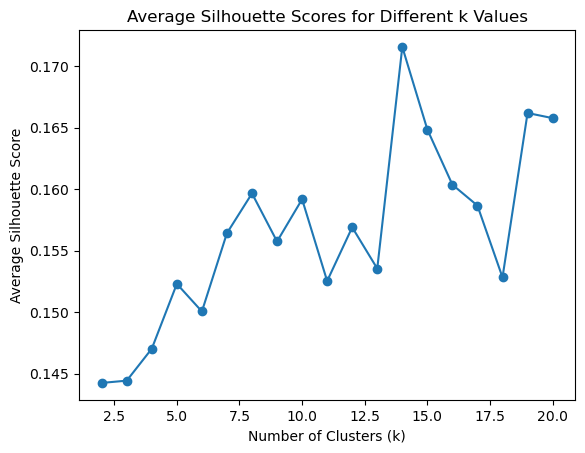

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('google_review_ratings.csv',header='infer')


# Assuming 'User' column is not necessary for clustering
data = data.drop(columns=['User'])

data = data.apply(lambda x: x.fillna(x.mean()), axis=0)  # Replacing NaN values with column mean

silhouette_avg_scores = []
k_values = range(2, 21)  # k=1 is not a valid value for silhouette score

for k in k_values:
    silhouette_scores = []
    for _ in range(5):  # Running k-means 5 times
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    silhouette_avg_scores.append(sum(silhouette_scores) / len(silhouette_scores))

plt.plot(k_values, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Scores for Different k Values')
plt.show()


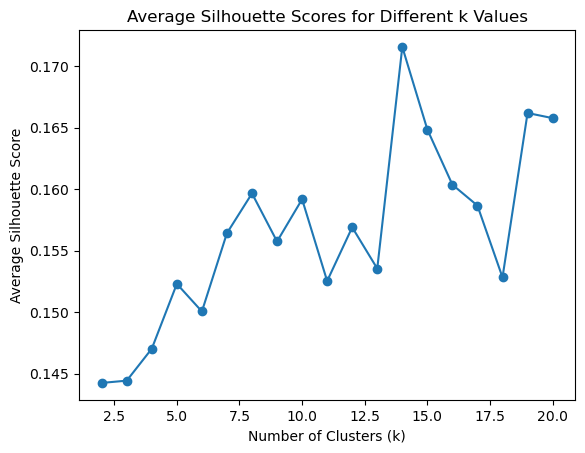

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


data = pd.read_csv('google_review_ratings.csv')
data = data.drop(columns=['User'])  # Dropping 'User' column as assumed it's not needed for clustering
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)  # Replacing NaN values with column mean

silhouette_avg_scores = []
k_values = range(2, 21)  # k=1 is not valid for silhouette score, so starting from k=2

for k in k_values:
    silhouette_scores = []
    for _ in range(5):  # Running k-means 5 times
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    silhouette_avg_scores.append(sum(silhouette_scores) / len(silhouette_scores))
    
plt.plot(k_values, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Scores for Different k Values')
plt.show()


1b.      Train a k-means model with the best k above.      Report the centroids of clusters.

Centroids of clusters:
[[1.8569697  2.10969697 2.60323232 3.81722222 3.78434343 2.76944444
  3.28823232 2.99383838 3.75434343 3.46969697 4.33252525 1.81136364
  4.9490404  2.38808081 1.62863636 1.04909091 0.89212121 0.76712121
  0.68868687 0.67691919 0.69040404 4.21616162 2.84838384 1.69616162]
 [1.12216949 2.64827119 2.31430508 2.21630508 2.48130508 3.35274576
  4.63555932 3.18383051 4.59445763 3.46184746 2.22474576 1.90489831
  2.06525424 2.94020339 4.92218644 0.73059322 0.63044068 0.63313559
  0.67250847 0.78581356 0.84916949 0.91862712 0.93527119 1.04315254]
 [1.36884127 3.64284127 4.24233333 4.09746032 4.39461905 3.70784127
  3.24180952 2.34419048 2.70725397 2.71403175 2.13550794 1.81411111
  1.68914286 1.53403175 1.60926984 1.38406349 0.5738254  0.33957143
  0.35396825 0.61361905 0.78333333 0.85192063 0.98730159 1.10515873]
 [1.33905797 3.29373188 2.47818841 2.27221014 2.8782971  3.47206522
  4.43427536 3.33282609 3.64775362 2.85605072 2.57391304 2.3351087
  2.54605072 4.72177536

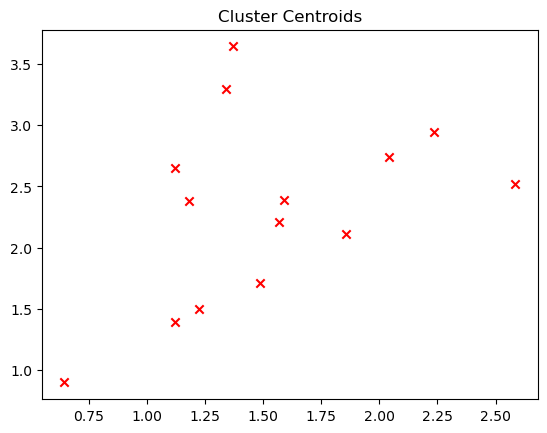

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Load and preprocess the data (assuming it has been preprocessed as in task 1a)
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Train a k-means model with k=14
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(data)

# Report the centroids of clusters
centroids = kmeans.cluster_centers_
print(f'Centroids of clusters:\n{centroids}')


# If needed, you can plot the centroids to visualize them
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.title('Cluster Centroids')
plt.show()


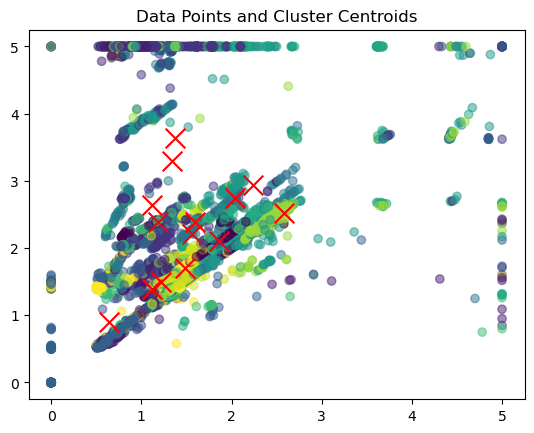

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Train a k-means model with k=14
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Report the centroids of clusters
centroids = kmeans.cluster_centers_

# Assuming your data is 2-dimensional for simplicity in plotting
# If your data has more dimensions, you might want to use PCA to reduce dimensions before plotting
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)  # Plot data points
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)  # Plot centroids

plt.title('Data Points and Cluster Centroids')
plt.show()


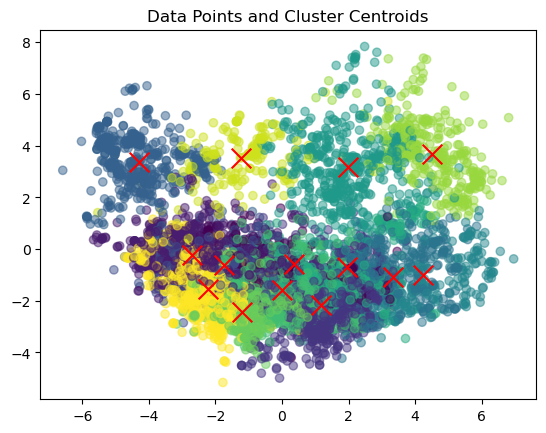

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Train a k-means model with k=14
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Report the centroids of clusters
centroids = kmeans.cluster_centers_

# Reduce data dimensions for plotting (if necessary)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids)

# Plot the data points and centroids
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)  # Plot data points
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='red', s=200)  # Plot centroids

plt.title('Data Points and Cluster Centroids')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load and preprocess the data (assuming it has been preprocessed as in task 1a)
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Lists to store the average silhouette scores for each k for the three methods
kmeans_sil_scores, gmm_sil_scores, sc_sil_scores = [], [], []

# Loop through the range of k values
for k in range(2, 21):  # k=1 is not a valid value for silhouette score
    kmeans_scores, gmm_scores, sc_scores = [], [], []
    for _ in range(5):  # Running each clustering method 5 times for each k value
        # K-means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        kmeans_scores.append(silhouette_score(data, kmeans_labels))

        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm_labels = gmm.fit_predict(data)
        gmm_scores.append(silhouette_score(data, gmm_labels))

        # Spectral Clustering
        sc = SpectralClustering(n_clusters=k, random_state=42)
        sc_labels = sc.fit_predict(data)
        sc_scores.append(silhouette_score(data, sc_labels))
    
    # Calculating the average silhouette scores across the 5 runs for each k value and each method
    kmeans_sil_scores.append(sum(kmeans_scores) / len(kmeans_scores))
    gmm_sil_scores.append(sum(gmm_scores) / len(gmm_scores))
    sc_sil_scores.append(sum(sc_scores) / len(sc_scores))

# Plotting the average silhouette scores for different k values for all three methods
plt.plot(range(2, 21), kmeans_sil_scores, label='K-means', marker='o')
plt.plot(range(2, 21), gmm_sil_scores, label='Gaussian Mixture Model', marker='o')
plt.plot(range(2, 21), sc_sil_scores, label='Spectral Clustering', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Comparison of Clustering Methods')
plt.legend()
plt.show()
